# Pymaceuticals Inc.
---

### Analysis

-   A general assumption would be that if more resources are spent on something, the better its performance should be. This dataset, however, presents an opposite finding. The schools with the lowest spending ranges (less than $585 per student) delivered better average math and reading scores as well as better passing rates for students overall and in both math and reading. These schools not only had lower per student budget, but their overall total budgets were also lesser compared to other schools in the district.

-	Small-sized (less than 1000 students) and medium-sized (1000 to 2000 students) had almost similar average scores (about 83 for both math and reading) and passing rates (about 93% for math, 96% for reading, and 90% overall). These schools outperformed the large-sized schools (2000 to 5000 students) especially in terms of passing scores.

-	Charter schools clearly outperformed the District schools by having higher average scores as well as passing rates. The top 5 best performing schools based on overall scores are Charter whereas the bottom 5 are District. This could be attributable to the fact that charter schools have lesser number of students but no significant correlation can be drawn from the provided data to support this reasoning.

-	Students in all grades had almost similar academic performance across all categories.

-	Overall, students tend to perform better in reading (79%-97%) as compared to maths (65%-94%) in terms of passing scores. The overall passing rates (52%-91%) are comparatively lower than the average of passing rates for math and reading. This implies that not all the students scoring 70 or higher in math are scoring the same in reading and vice versa.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
mice_count = len(df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_mice_id.unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = df.loc[df['Mouse ID'] == 'g989',:]
duplicate_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.loc[df['Mouse ID'] != 'g989',:]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(cleaned_df['Mouse ID'].unique())
mice_count_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_data = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
tumor_volume_mean = tumor_data.mean()
tumor_volume_median = tumor_data.median()
tumor_volume_variance = tumor_data.var(ddof=1)
tumor_volume_stdev = tumor_data.std(ddof=1)
tumor_volume_sem = tumor_data.sem(ddof=1)

# # Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume" : tumor_volume_mean,
                              "Median Tumor Volume" : tumor_volume_median,
                              "Tumor Volume Variance" : tumor_volume_variance,
                              "Tumor Volume Std. Dev." : tumor_volume_stdev,
                              "Tumor Volume Std. Err." : tumor_volume_sem})
tumor_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_data_summary = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_data_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

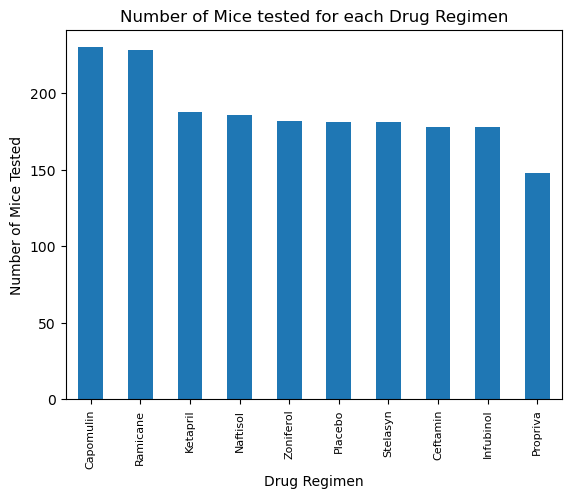

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_specimen_data = cleaned_df.groupby(['Drug Regimen'])
timepoint_data = drug_specimen_data['Timepoint'].count().sort_values(ascending=False)
figure1 = timepoint_data.plot(kind="bar",
                              title="Number of Mice tested for each Drug Regimen")
figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Number of Mice Tested")
xticklabels = timepoint_data.index
figure1.set_xticklabels(xticklabels, rotation=90, fontsize=8)

plt.tight_layout
plt.show()


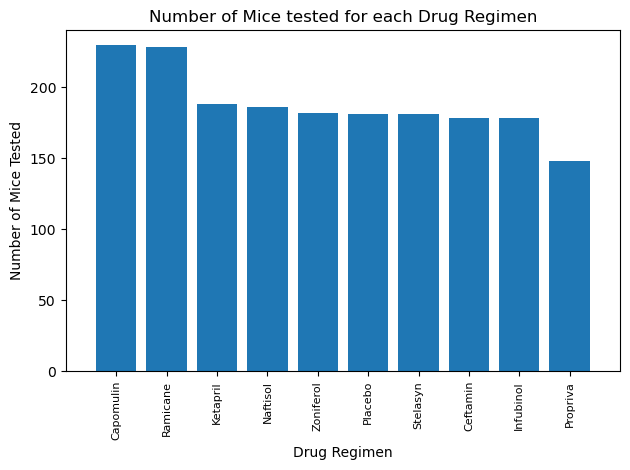

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_data))
figure2 = plt.bar(x_axis, timepoint_data.sort_values(ascending=False), align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_data.index, rotation="vertical", fontsize=8)
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(timepoint_data)+10)
plt.title("Number of Mice tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()

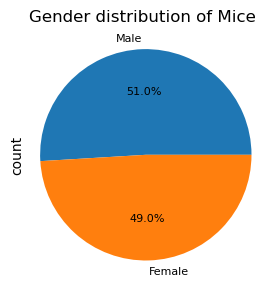

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned_df['Sex'].value_counts()
figure3 = gender.plot(kind="pie", y='Sex', autopct="%1.1f%%", figsize=(3,3), subplots=True, 
                      legend=False, fontsize=8, title="Gender distribution of Mice")

plt.axis("equal")
plt.show()

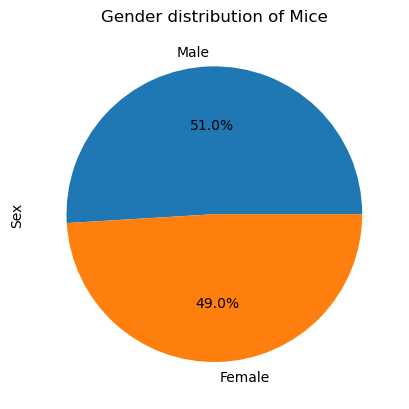

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0,0)
figure4 = plt.pie(gender, labels=gender.index.values, explode=explode, 
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.title("Gender distribution of Mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = cleaned_df.groupby(cleaned_df['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_df = pd.merge(cleaned_df, group_df, on=('Mouse ID', 'Timepoint'), how='right')
treatments_df.reset_index(drop=True)
treatments_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
   # add subset 
for drug in treatments:
    drug_data = treatments_df.loc[treatments_df["Drug Regimen"] == drug]
    tumor_vol_data.append(drug_data["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds

    quartiles = drug_data['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = round(lowerq - (1.5*iqr), 5)
    upper_bound = round(upperq + (1.5*iqr), 5)
    
    outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] >= upper_bound) | 
                             (drug_data["Tumor Volume (mm3)"] <= lower_bound)]
    outliers_values = outliers['Tumor Volume (mm3)']

    print(f"{drug} has lower boundary of {lower_bound} and upper boundary of {upper_bound}.")
    print(f"{drug}'s potential outliers: {outliers_values}")
    print(f"----------------------------------------------------------------------------------")

Capomulin has lower boundary of 20.70456 and upper boundary of 51.83202.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------
Ramicane has lower boundary of 17.91266 and upper boundary of 54.30681.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------
Infubinol has lower boundary of 36.8329 and upper boundary of 82.74145.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------------------------------------------------------------
Ceftamin has lower boundary of 25.35545 and upper boundary of 87.66646.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------


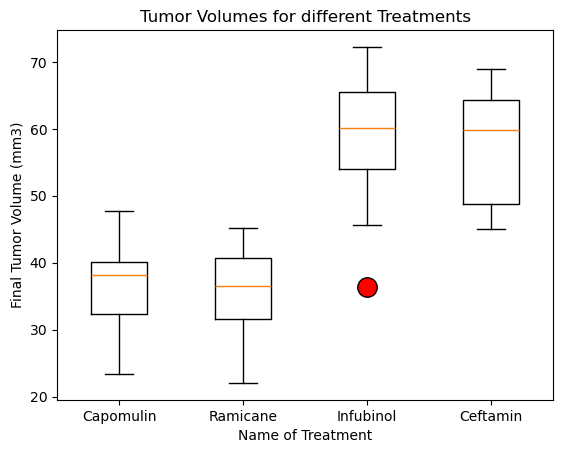

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker_details = dict(markerfacecolor='r', markersize=14, markeredgecolor='black')
figure5, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops=marker_details)

plt.title("Tumor Volumes for different Treatments")
plt.xlabel('Name of Treatment')
plt.ylabel("Final Tumor Volume (mm3)")
plt.rcParams["figure.figsize"]=(7,5)
plt.rcParams["font.size"]=10
plt.tick_params(labelsize=10)
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

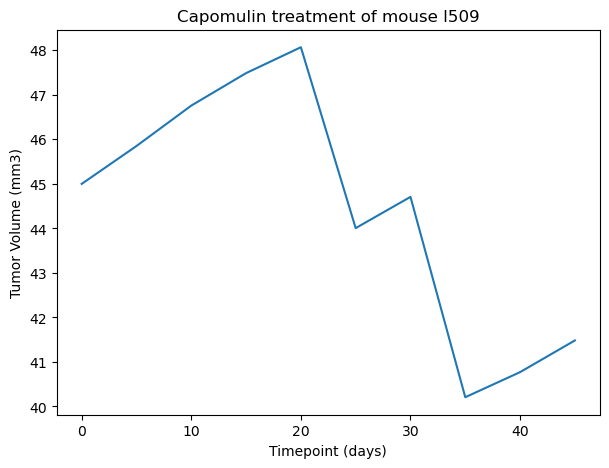

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_data = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509"]
timepoint = line_data["Timepoint"]
tumor_volume = line_data["Tumor Volume (mm3)"]
figure6 = plt.plot(timepoint, tumor_volume)

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get the data for Average Tumor Volume and Mouse Weight for Capomulin and group by Mouse ID
scatter_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
scatter_average_data = scatter_data.groupby(scatter_data)["Mouse ID"].mean()
avg_tumor_volume = scatter_average_data["Tumor Volume (mm3)"]
mouse_weight = scatter_average_data["Weight (g)"]

# Plot the data
figure7 = plt.scatter(mouse_weight, avg_tumor_volume)

# Add chart title and labels
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = mouse_weight
y_values = avg_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

figure8 = plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=12,color="red")

plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

NameError: name 'mouse_weight' is not defined